#Clases desbalanceadas

##Escenario: clasificacion de Iris
El conjunto de datos de Iris es un famoso y ampliamente utilizado conjunto de datos para el aprendizaje automático y la clasificación de patrones. Fue introducido por el estadístico y biólogo británico Ronald A. Fisher en 1936. Este conjunto de datos es particularmente relevante en el campo de la botánica y ha sido una herramienta fundamental para comprender y clasificar especies de plantas de iris, a traves de las mediciones de los petalos y sepalos (capa exterior que rodea y protege los componentes internos de la flor) de la flor.
Clasificar correctamente las especies de iris es esencial para la investigación botánica y la horticultura. Las especies de iris tienen diferencias distintivas en sus características morfológicas, y esta clasificación precisa es fundamental para estudiar la diversidad y distribución de las especies en la naturaleza. Además, la clasificación de iris también es relevante en la agricultura y la jardinería, ya que permite identificar las variedades de iris más adecuadas para diferentes entornos y propósitos.
El conjunto de datos de Iris se ha convertido en un ejemplo clásico en la comunidad de aprendizaje automático debido a su simplicidad y a la posibilidad de resolver un problema de clasificación con múltiples clases. Los investigadores y estudiantes han utilizado este conjunto de datos para desarrollar y probar algoritmos de clasificación, evaluando así la eficacia de diferentes métodos de aprendizaje automático.

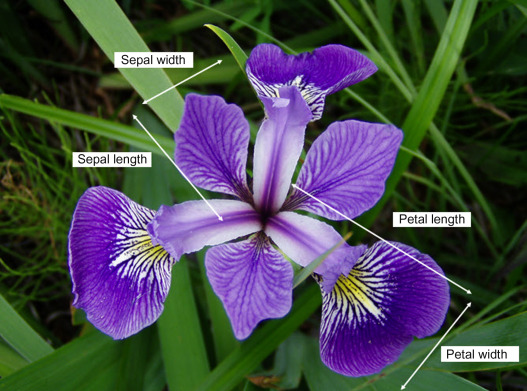

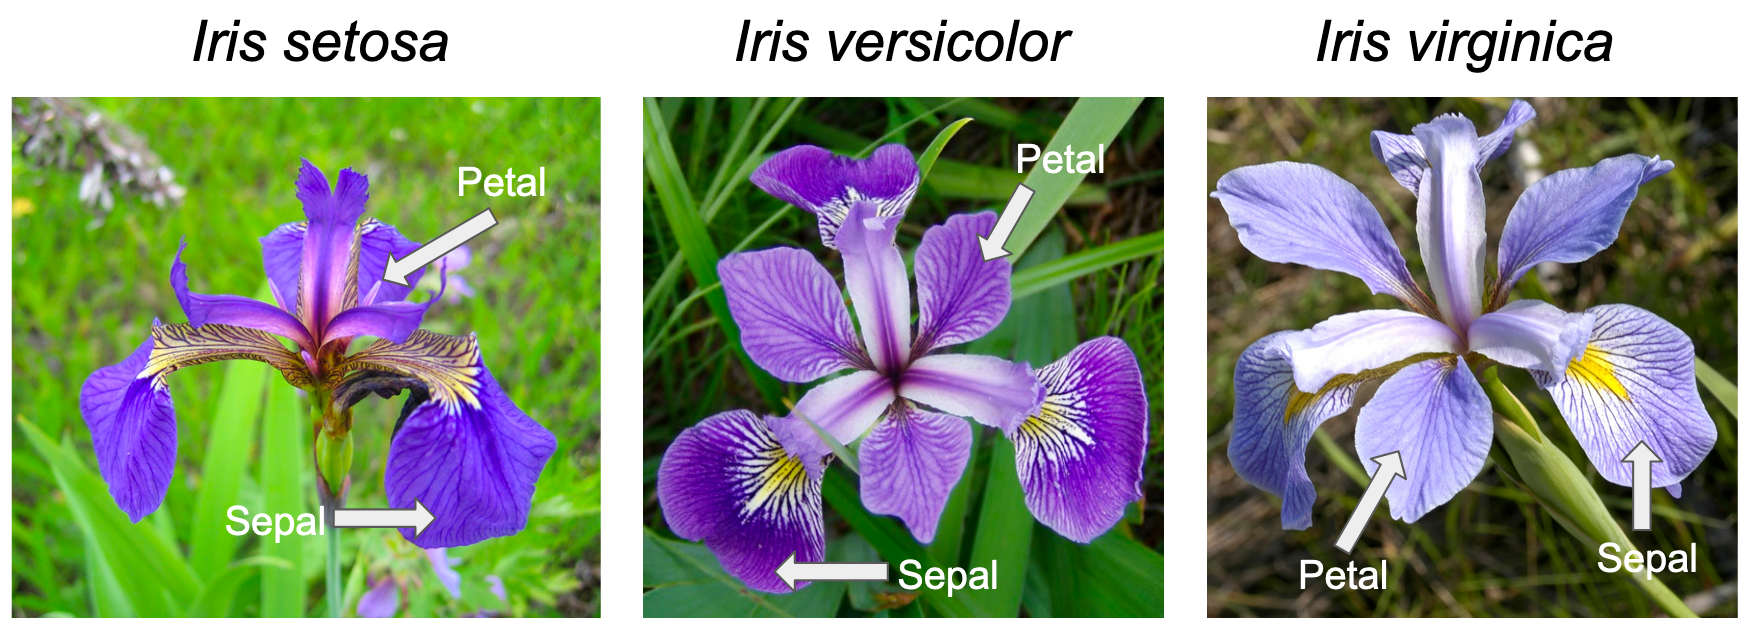

El dataset puede accederse desde aca: https://archive.ics.uci.edu/static/public/53/iris.zip


El conjunto de datos de Iris consta de 150 muestras de flores iris, donde cada muestra pertenece a una de las tres especies diferentes: setosa, versicolor y virginica.
Cada muestra contiene cuatro características (registradas en centímetros):


*   longitud del sépalo
*   ancho del sépalo
*   longitud del pétalo
*   ancho del pétalo

In [ ]:
import pandas as pd  # Importando Pandas para manipulación y análisis de datos
import numpy as np  # Importando NumPy para cálculos numéricos
import tensorflow as tf  # Importando TensorFlow para construir modelos de aprendizaje automático
from sklearn.model_selection import train_test_split  # Importando train_test_split para dividir el conjunto de datos
from sklearn.preprocessing import LabelEncoder  # Importando LabelEncoder para codificar las etiquetas de destino
from tensorflow import keras  # Importando Keras para construir redes neuronales
from keras.layers import Dense  # Importando Dense para crear capas totalmente conectadas
from keras.models import Sequential  # Importando Sequential para construir modelos secuenciales

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Leer el dataset
url = '/content/iris.data'  # Asegúrate de que el archivo CSV esté en la carpeta content
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=column_names)




# Procesar los datos
X = df.drop('species', axis=1).values
y = df['species'].values



# Codificar las etiquetas de clase en números
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Nombres de las clases
class_names = encoder.classes_



# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo neuronal
model = Sequential()
model.add(Dense(128, input_shape=(4,), activation='relu'))
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))


# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Obtener las predicciones para los datos de prueba
y_pred = model.predict(X_test)

# Convertir las probabilidades en etiquetas predichas (usando el índice del valor máximo)
y_pred = np.argmax(y_pred, axis=1)

# Comparar las etiquetas predichas con las etiquetas reales y calcular la precisión manualmente
accuracy = np.mean(y_pred == y_test)

# Imprimir la precisión en los datos de prueba
print("Precisión en los datos de prueba:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

print("\nMatriz de confusión:")
print(conf_df)

Epoch 1/100
4/4 [==============================] - 1s 82ms/step - loss: 1.1298 - accuracy: 0.4500 - val_loss: 0.9851 - val_accuracy: 0.7000
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.9826 - accuracy: 0.4583 - val_loss: 0.9521 - val_accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9030 - accuracy: 0.4500 - val_loss: 0.8480 - val_accuracy: 0.8667
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8168 - accuracy: 0.7917 - val_loss: 0.7683 - val_accuracy: 0.7000
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.7634 - accuracy: 0.6583 - val_loss: 0.7134 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.7105 - accuracy: 0.6667 - val_loss: 0.6694 - val_accuracy: 0.7667
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.6613 - accuracy: 0.8167 - val_loss: 0.6260 - val_accuracy: 0.8667
Epoch 8/100
4/4 [===

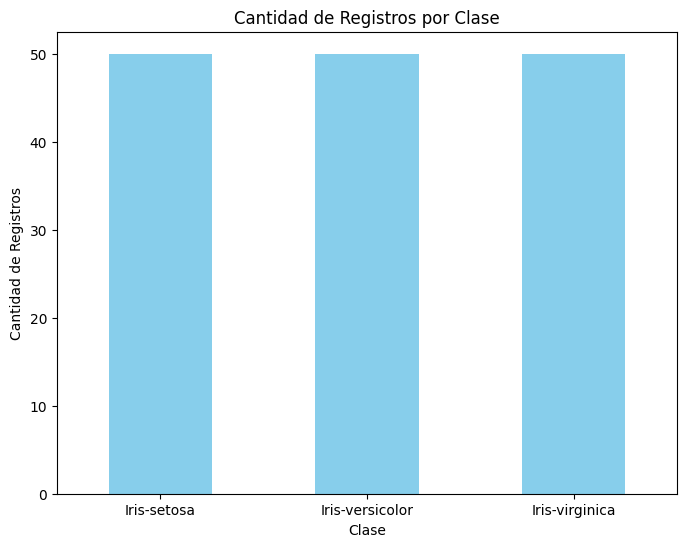

In [ ]:
#composicion de los datos

import matplotlib.pyplot as plt

# Imprimir gráfico de barras con la cantidad de registros por clase
plt.figure(figsize=(8, 6))
df['species'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Registros por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)
plt.show()

<ipython-input-3-7d5f13b152d7>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_auxiliar = df_auxiliar.append(row)
<ipython-input-3-7d5f13b152d7>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_auxiliar = df_auxiliar.append(row)
<ipython-input-3-7d5f13b152d7>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_auxiliar = df_auxiliar.append(row)
<ipython-input-3-7d5f13b152d7>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_auxiliar = df_auxiliar.append(row)
<ipython-input-3-7d5f13b152d7>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Epoch 1/100
3/3 [==============================] - 1s 109ms/step - loss: 1.0196 - accuracy: 0.5185 - val_loss: 0.9336 - val_accuracy: 0.3810
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.8164 - accuracy: 0.5556 - val_loss: 0.8209 - val_accuracy: 0.5714
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7686 - accuracy: 0.4815 - val_loss: 0.7882 - val_accuracy: 0.5714
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7141 - accuracy: 0.6667 - val_loss: 0.7900 - val_accuracy: 0.4762
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6719 - accuracy: 0.5556 - val_loss: 0.7945 - val_accuracy: 0.3810
Epoch 6/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6562 - accuracy: 0.5432 - val_loss: 0.7759 - val_accuracy: 0.5238
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6342 - accuracy: 0.6543 - val_loss: 0.7502 - val_accuracy: 0.8571
Epoch 8/100
3/3 [==

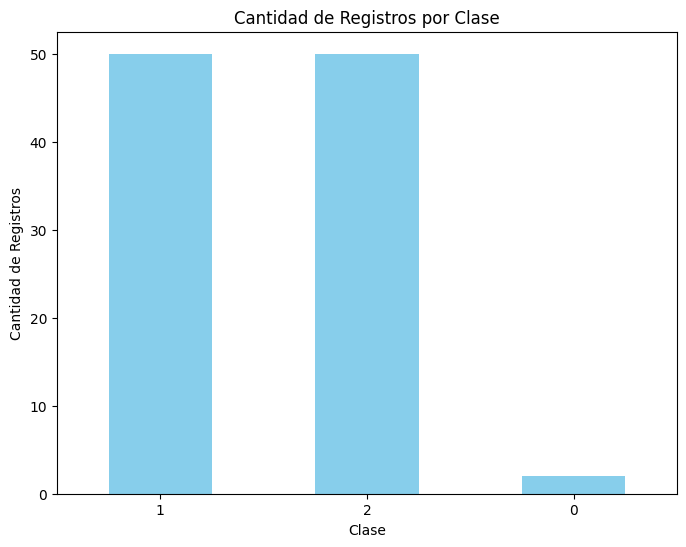


Matriz de confusión:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                1                0               0
Iris-versicolor            0               12               0
Iris-virginica             0                3               5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

# Leer el dataset
url = '/content/iris.data'  # Asegúrate de que el archivo CSV esté en la carpeta content
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=column_names)

# Crear una variable auxiliar para almacenar los datos procesados
df_auxiliar = pd.DataFrame(columns=column_names)

# Controlar la cantidad de registros de la clase 'Iris-setosa'
cantidad_colocadas = 0

# Procesar los datos y eliminar 45 registros de la clase 'Iris-setosa'
for index, row in df.iterrows():
    if row['species'] == 'Iris-setosa' and cantidad_colocadas < 2:
        df_auxiliar = df_auxiliar.append(row)
        cantidad_colocadas += 1
    elif row['species'] != 'Iris-setosa':
        df_auxiliar = df_auxiliar.append(row)

# Codificar las etiquetas de clase en números
encoder = LabelEncoder()
df_auxiliar['species'] = encoder.fit_transform(df_auxiliar['species'])

# Nombres de las clases
class_names = encoder.classes_

# Dividir los datos en entrenamiento y prueba
X = df_auxiliar.drop('species', axis=1).values
y = df_auxiliar['species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo neuronal
model = Sequential()
model.add(Dense(128, input_shape=(4,), activation='relu'))
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Obtener las predicciones para los datos de prueba
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Comparar las etiquetas predichas con las etiquetas reales y calcular la precisión manualmente
accuracy = np.mean(y_pred == y_test)

# Imprimir la precisión en los datos de prueba
print("Precisión en los datos de prueba:", accuracy)

# Imprimir gráfico de barras con la cantidad de registros por clase
plt.figure(figsize=(8, 6))
df_auxiliar['species'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Registros por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

print("\nMatriz de confusión:")
print(conf_df)
